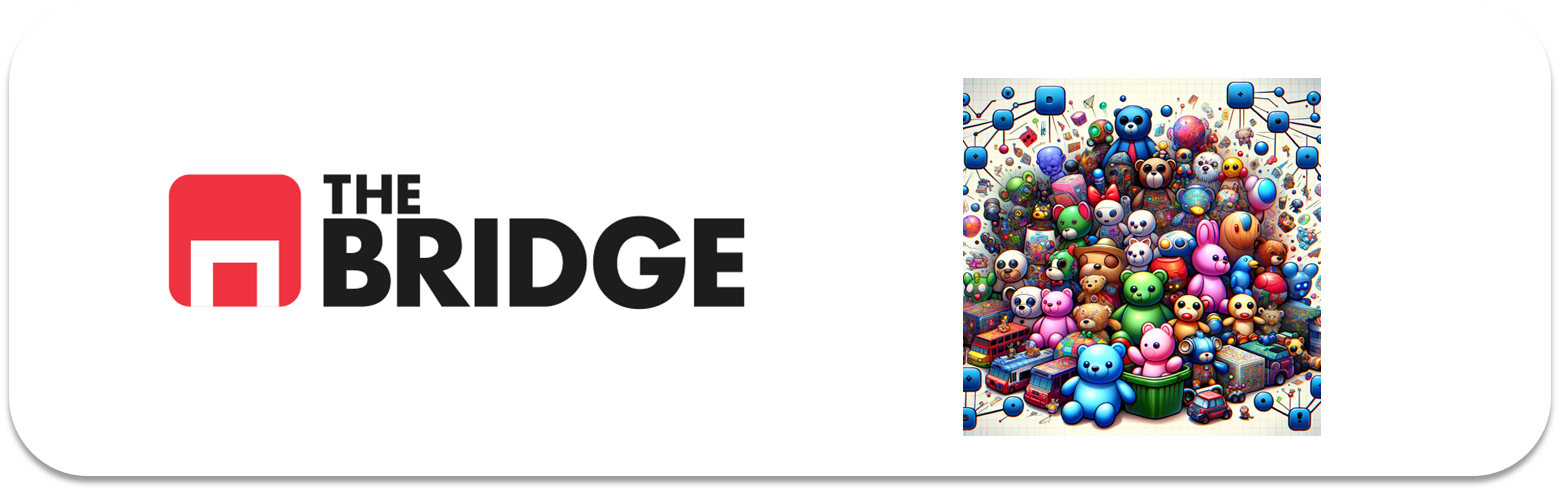

## **K-Means**

El modelo k-means es un algoritmo de clustering (agrupamiento) que busca particionar un conjunto de datos en k grupos distintos de manera que cada punto pertenezca al grupo cuyo valor medio es más cercano. Es un método de clustering no supervisado que se utiliza ampliamente para análisis exploratorio de datos y para encontrar patrones naturales en los conjuntos de datos.

### Cómo invocar el modelo k-means con sklearn

Para utilizar el modelo k-means en `sklearn`, primero se debe importar `KMeans` desde `sklearn.cluster`. Luego, se crea una instancia del modelo especificando los hiperparámetros deseados. Finalmente, se ajusta el modelo a los datos usando el método `.fit()` o `.fit_predict()` para agrupar los datos y/o predecir las etiquetas de los clusters directamente.

```python
from sklearn.cluster import KMeans

# Creación de una instancia de KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Ajuste del modelo a los datos
kmeans.fit(X)

# Opcional: predecir las etiquetas de los clusters para los datos
labels = kmeans.predict(X)



### Hiperparámetros

- `n_clusters`: Número de clusters a formar y número de centroides a generar. Es el parámetro más importante y debe ser decidido previamente o mediante análisis.
- `init`: Método de inicialización de los centroides. Puede ser 'k-means++' (predeterminado), 'random' o un ndarray que especifique los centroides iniciales.
- `n_init`: Número de veces que el algoritmo k-means se ejecutará con diferentes semillas de centroides. El resultado final será la mejor salida de `n_init` ejecuciones consecutivas en términos de inercia.
- `max_iter`: Máximo número de iteraciones para una sola ejecución.
- `random_state`: Semilla utilizada por el generador de números aleatorios, útil para la reproducibilidad de los resultados.


### Cómo buscar el número óptimo de clusters (k) usando el método del codo

El método del codo es una técnica heurística para determinar el número de clusters en un conjunto de datos. La idea es ejecutar el algoritmo k-means sobre el conjunto de datos para un rango de valores de `k` y para cada valor, calcular la suma de las distancias al cuadrado de los puntos a su centroide más cercano (inercia). Luego, se grafican estos valores de inercia en función de `k` y se busca el "codo", el punto donde la tasa de disminución cambia abruptamente. Este punto es generalmente considerado como una buena indicación del número óptimo de clusters.

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Rango de valores de k para probar
ks = range(1, 10)
inertias = []

for k in ks:
    # Creación y ajuste de KMeans para cada valor de k
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    # Almacenamiento de la inercia en la lista
    inertias.append(model.inertia_)

# Gráfico del método del codo
plt.figure(figsize=(8, 5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Inercia')
plt.xticks(ks)
plt.title('Método del codo para determinar el número óptimo de clusters')
plt.show()




### Determinación del número óptimo de clusters (k) mediante el uso de los diagramas de silueta

Los diagramas de silueta pueden utilizarse para determinar el grado de separación entre los clusters. Para cada valor de \(k\), el coeficiente de silueta para cada muestra es un medida de cuán similar es esa muestra a los clusters a los que está asignada, en comparación con otros clusters. El valor promedio del coeficiente de silueta para todas las muestras puede usarse como una métrica para juzgar cuántos clusters usar.

```python
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import numpy as np

# Rango de valores de k para probar
ks = range(2, 10)
silhouette_scores = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, labels))

# Gráfico de los scores de silueta para diferentes valores de k
plt.figure(figsize=(8, 5))
plt.plot(ks, silhouette_scores, '-o')
plt.xlabel('Número de clusters, k')
plt.ylabel('Score de silueta')
plt.xticks(ks)
plt.title('Diagrama de silueta para determinar el número óptimo de clusters')
plt.show()

# Opcional: Mostrar los diagramas de silueta para el número óptimo de clusters
optimal_k = ks[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X)
silhouette_vals = silhouette_samples(X, labels)

# Visualización de los valores de silueta para el número óptimo de clusters
y_ticks = []
y_lower, y_upper = 0, 0
for i, cluster in enumerate(np.unique(labels)):
    cluster_silhouette_vals = silhouette_vals[labels == cluster]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i + 1))
    y_lower += len(cluster_silhouette_vals)

plt.axvline(x=silhouette_score(X, labels), color="red", linestyle="--")
plt.ylabel('Cluster')
plt.xlabel('Coeficiente de silueta')
plt.title('Visualización de los valores de silueta')
plt.show()


* Criterios: Buscar k tal que: 
1. Los clusters (cuchillos) deben superar el shiloutte score (línea vertical roja discontinua)
2. Los clusters no deberían tener puntos en valores negativos del eje x (coeficientes de silueta)


### Sugerencias de cuándo aplicar el modelo k-means

El modelo k-means es especialmente útil en situaciones donde se necesita una rápida exploración de los datos para identificar agrupaciones naturales sin etiquetas previas. Algunos ejemplos incluyen:

- Segmentación de clientes en marketing para identificar grupos con comportamientos o preferencias similares.
- Análisis de grupos en datos genéticos